The code below is the start of my capstone project

The data I am using is from the CNBC Website https://www.cnbc.com/2025/02/14/cnbcs-official-nba-team-valuations-2025.html and https://www.cnbc.com/2024/09/05/official-nfl-team-valuations-2024.html

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


The code below moved my csv files in to actual dataframes for my code to read

In [2]:
import pandas as pd

df = pd.read_csv('CNBC NBA Franchise Valuation.csv')
print(df.head())

df1 = pd.read_csv('CNBC NFL Franchise Values.csv')
print(df1.head())

   Rank                   Team  Value Revenue EBITDA Debt as % of Value  \
0     1  Golden State Warriors  $9.4B   $781M  $155M                 9%   
1     2        New York Knicks  $7.5B   $578M  $178M                 4%   
2     3     Los Angeles Lakers    $7B   $528M  $191M                 3%   
3     4          Chicago Bulls  $5.8B   $402M  $118M                 3%   
4     5        Houston Rockets  $5.7B   $402M  $119M                 4%   

                                            Owner(s)  
0                             Joe Lacob, Peter Guber  
1                       Madison Square Garden Sports  
2  Jerry Buss family trust, Mark Walter, Todd Boehly  
3                                    Jerry Reinsdorf  
4                                    Tilman Fertitta  
   Rank                  Team   Value Revenue EBITDA Debt as % of value  \
0     1        Dallas Cowboys    $11B  $1.22B  $550M                 3%   
1     2      Los Angeles Rams     $8B   $825M  $243M                4

The code below removed columns that I was not wanting to report on or didn't add any value to my project

In [3]:
df.drop(columns=['EBITDA', 'Debt as % of Value', 'Owner(s)', 'Rank'], inplace=True)

print(df)

df1.drop(columns=['EBITDA', 'Debt as % of value', 'Owner(s)', 'Rank'], inplace=True)

print(df1)

                      Team   Value Revenue
0    Golden State Warriors   $9.4B   $781M
1          New York Knicks   $7.5B   $578M
2       Los Angeles Lakers     $7B   $528M
3            Chicago Bulls   $5.8B   $402M
4          Houston Rockets   $5.7B   $402M
5            Brooklyn Nets   $5.6B   $389M
6           Boston Celtics   $5.5B   $452M
7     Los Angeles Clippers   $5.4B   $351M
8               Miami Heat   $5.1B   $394M
9         Dallas Mavericks     $5B   $430M
10      Philadelphia 76ers   $4.9B   $394M
11            Phoenix Suns   $4.6B   $377M
12         Toronto Raptors   $4.5B   $349M
13        Sacramento Kings  $4.45B   $425M
14     Cleveland Cavaliers  $4.35B   $406M
15           Atlanta Hawks   $4.3B   $384M
16      Washington Wizards  $4.25B   $357M
17          Denver Nuggets   $4.2B   $386M
18         Milwaukee Bucks   $4.1B   $350M
19               Utah Jazz  $3.75B   $367M
20       San Antonio Spurs   $3.7B   $344M
21  Portland Trail Blazers  $3.65B   $339M
22         

The code below allowed me to display my combined dataframe in to more coherent manner for reading

In [4]:
Franchisevalues = pd.concat([df, df1],  ignore_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(Franchisevalues)


                      Team   Value Revenue
0    Golden State Warriors   $9.4B   $781M
1          New York Knicks   $7.5B   $578M
2       Los Angeles Lakers     $7B   $528M
3            Chicago Bulls   $5.8B   $402M
4          Houston Rockets   $5.7B   $402M
5            Brooklyn Nets   $5.6B   $389M
6           Boston Celtics   $5.5B   $452M
7     Los Angeles Clippers   $5.4B   $351M
8               Miami Heat   $5.1B   $394M
9         Dallas Mavericks     $5B   $430M
10      Philadelphia 76ers   $4.9B   $394M
11            Phoenix Suns   $4.6B   $377M
12         Toronto Raptors   $4.5B   $349M
13        Sacramento Kings  $4.45B   $425M
14     Cleveland Cavaliers  $4.35B   $406M
15           Atlanta Hawks   $4.3B   $384M
16      Washington Wizards  $4.25B   $357M
17          Denver Nuggets   $4.2B   $386M
18         Milwaukee Bucks   $4.1B   $350M
19               Utah Jazz  $3.75B   $367M
20       San Antonio Spurs   $3.7B   $344M
21  Portland Trail Blazers  $3.65B   $339M
22         

The below code is used to convert the values in the "Value" column to numerical values.  I then proceeded to perform a couple of calculations to give the user an idea of what they are looking at from an overall perspective

In [5]:
def convert_to_numeric(value):
    value = value.replace('$', '').replace('B', '')
    return float(value) * 1e9
df['Value'] = df['Value'].apply(convert_to_numeric)

def convert_to_numeric(Revenue):
    
    Revenue = Revenue.replace('$', '')
    
    if 'B' in Revenue:
        Revenue = Revenue.replace('B', '')
        return float(Revenue) * 1e9  
    elif 'M' in Revenue:
        Revenue = Revenue.replace('M', '')
        return float(Revenue) * 1e6  
    else:
        return float(Revenue) 

df['Revenue'] = df['Revenue'].apply(convert_to_numeric)


median_Value = df['Value'].median()

print(f"The Median Value for these franchises is: {median_Value}")

median_Revenue = df['Revenue'].median()

print(f"The Median Revenue for these franchises is: {median_Revenue}")

mean_Value = df['Value'].mean()

print(f"The Mean Value for these franchises is: {mean_Value}")

mean_Revenue = df['Revenue'].mean()

print(f"The Mean Revenue for these franchises is: {mean_Revenue}")

Variance_value = df['Value'].var()

print(f"The Standard Derivation for these franchises is: {Variance_value}")

Variance_Revenue = df['Revenue'].var()

print(f"The Standard Derivation for the Revenue of these franchises is: {Variance_Revenue}")


The Median Value for these franchises is: 4325000000.0
The Median Revenue for these franchises is: 372000000.0
The Mean Value for these franchises is: 4658333333.333333
The Mean Revenue for these franchises is: 390333333.3333333
The Standard Derivation for these franchises is: 1.9989798850574717e+18
The Standard Derivation for the Revenue of these franchises is: 9357885057471262.0


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


This code is to create a bar chart to demonstrate how the Professional Franchises are compared by the Franchise's Value

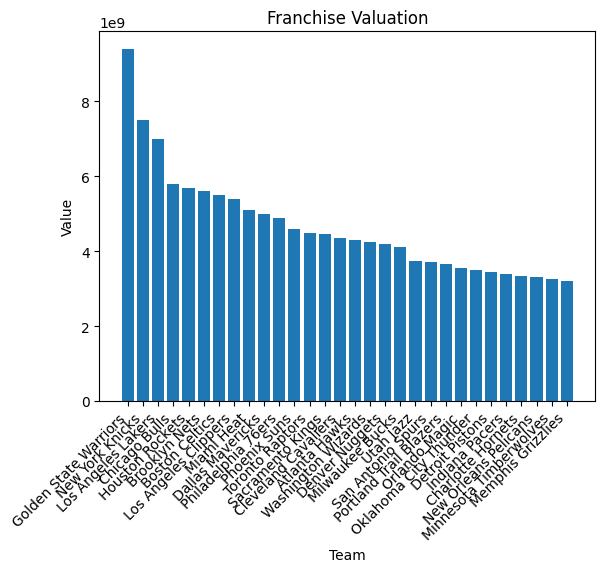

In [7]:
import matplotlib.pyplot as plt

Value = df['Value']
Team = df['Team']
plt.bar(Team, Value)
plt.title('Franchise Valuation')
plt.xlabel("Team")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right') 
plt.show()

This code creates a bar graph to show the comparison between the Franchises and their Revenue

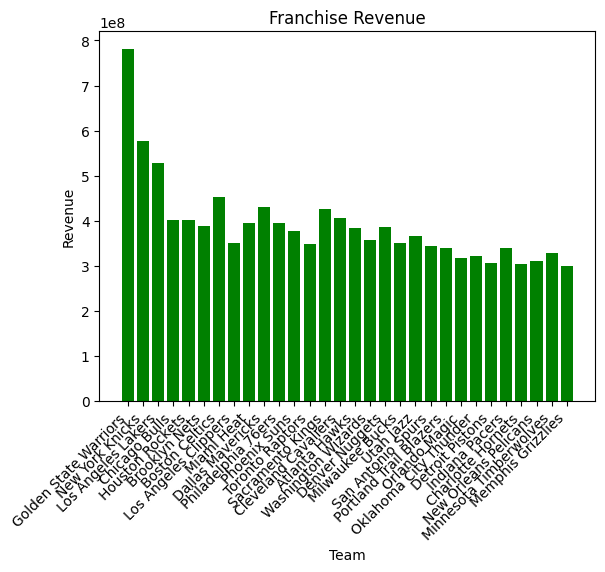

In [8]:
Revenue = df['Revenue']
Team = df['Team']
plt.bar(Team, Revenue, color='green')
plt.title('Franchise Revenue')
plt.xlabel("Team")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right') 
plt.show()

This code demonstrates the Franchises and their values utilizing a scatter plot

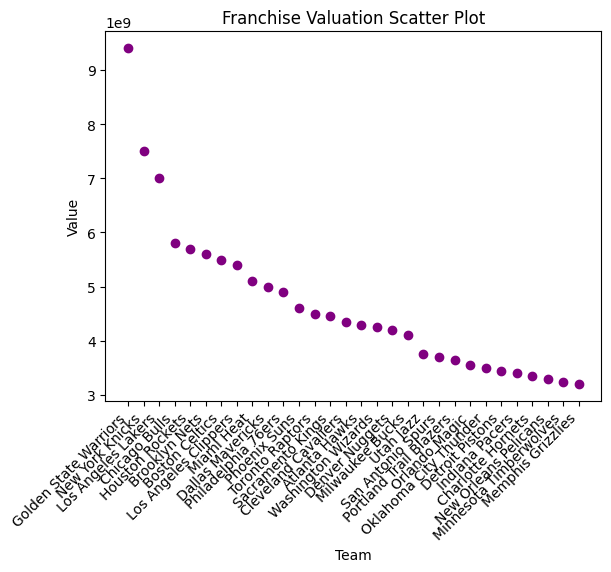

In [9]:
Value = df['Value']
Team = df['Team']
plt.scatter(Team, Value, c='purple')
plt.title('Franchise Valuation Scatter Plot')
plt.xlabel("Team")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right') 
plt.show()

In [11]:
df.dtypes

Team        object
Value      float64
Revenue    float64
dtype: object